Author: Python Engineer: Machine Learning algorithm implementations from scratch. https://www.youtube.com/playlist?list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(100)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize the centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)] #注意一定要有本行初始化，否則資料會重複存入clusters而錯誤
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 4))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


(500, 2)
2


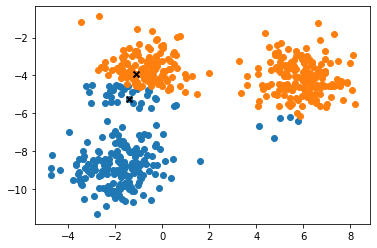

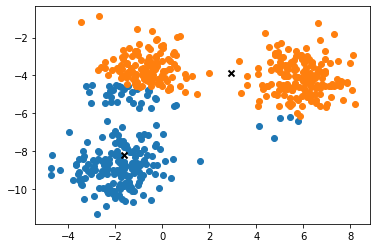

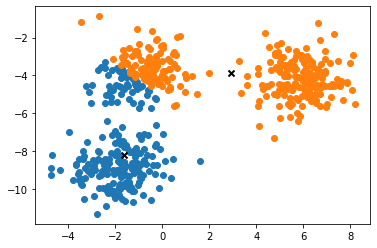

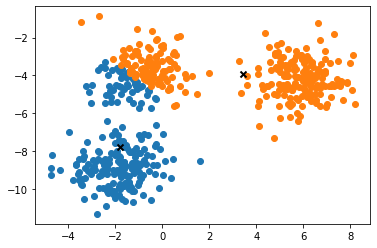

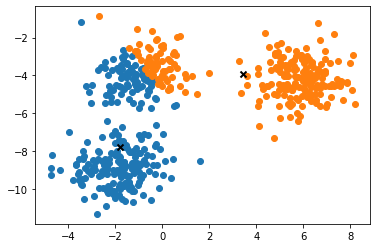

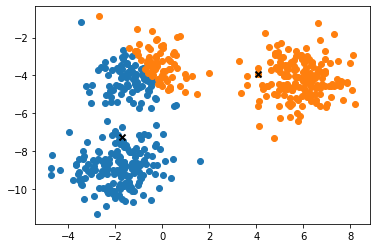

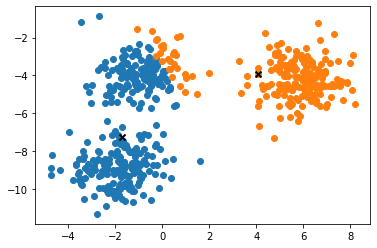

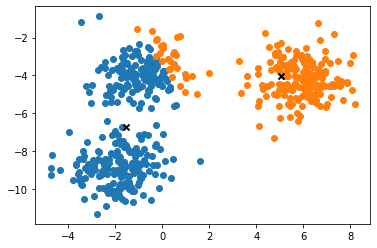

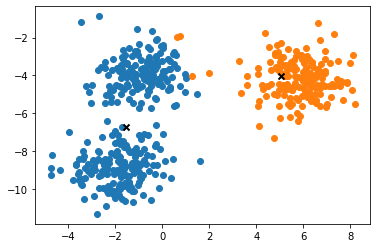

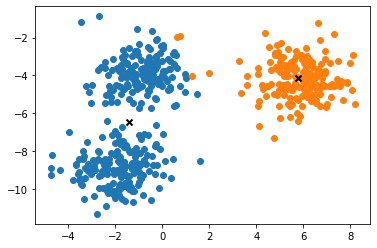

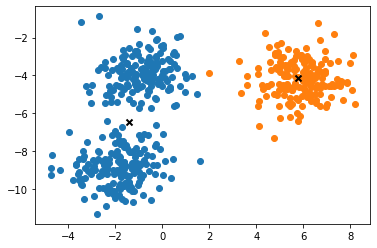

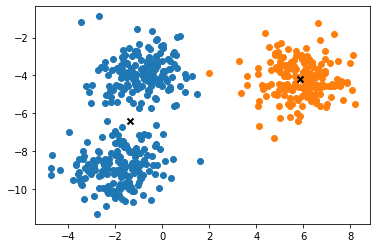

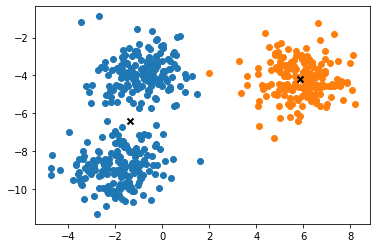

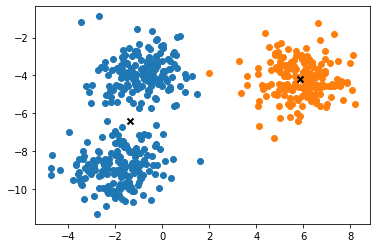

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

print(X.shape)

clusters = len(np.unique(y))
clusters = 2
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()

In [3]:
# The following are tests.

In [58]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
        centers=2, n_samples=10, n_features=2, shuffle=True, random_state=40
    )

In [59]:
print(X)
n_samples, n_features = X.shape
print(n_samples, n_features)

[[ 4.75369053 -4.38758934]
 [ 6.0641917  -4.14494599]
 [-3.69066047 -9.35968162]
 [ 0.4462309  -8.40386914]
 [-1.25797779 -8.00743496]
 [ 5.33251205 -3.76045281]
 [ 5.80242434 -2.98125644]
 [-1.13599245 -7.83714475]
 [-1.79218634 -8.63472578]
 [ 5.57168843 -5.52887991]]
10 2


In [68]:
import numpy as np

# initialize the clusters
clusters = [[] for _ in range(2)]
print(clusters)

[[], []]


In [69]:
# initialize the centroids
K=2
random_sample_idxs = np.random.choice(n_samples, K, replace=False)
print(random_sample_idxs)
centroids = [X[idx] for idx in random_sample_idxs]
print(centroids)

[6 7]
[array([ 5.80242434, -2.98125644]), array([-1.13599245, -7.83714475])]


In [62]:
# Assign the samples to the closest centroids to create clusters
clusters = [[] for _ in range(K)]
for idx, sample in enumerate(X):
#    print(idx,sample)
    distances = [np.sqrt(np.sum((sample - point) ** 2)) for point in centroids]
    closest_index = np.argmin(distances)
    centroid_idx = closest_index
    print(distances, centroid_idx, idx)
    clusters[centroid_idx].append(idx)
    print(clusters)

[0.0, 7.017366903566681] 0 0
[[0], []]
[1.3327749739490582, 8.278465262390139] 0 1
[[0, 1], []]
[9.799426793485388, 2.783256379960259] 1 2
[[0, 1], [2]]
[5.889372791705623, 1.7497106427180653] 1 3
[[0, 1], [2, 3]]
[7.017366903566681, 0.0] 1 4
[[0, 1], [2, 3, 4]]
[0.8534252030636924, 7.840370760994908] 0 5
[[0, 1, 5], [2, 3, 4]]
[1.7543132029377118, 8.666703447740614] 0 6
[[0, 1, 5, 6], [2, 3, 4]]
[6.8255254826696925, 0.20947357159112692] 1 7
[[0, 1, 5, 6], [2, 3, 4, 7]]
[7.802991215130748, 0.8239372244968336] 1 8
[[0, 1, 5, 6], [2, 3, 4, 7, 8]]
[1.4041598023337836, 7.265505886119754] 0 9
[[0, 1, 5, 6, 9], [2, 3, 4, 7, 8]]


In [63]:
# assign mean value of clusters to centroids
centroids = np.zeros((K, n_features))
for cluster_idx, cluster in enumerate(clusters):
    print(cluster_idx, cluster)
    print(X[cluster])
    cluster_mean = np.mean(X[cluster], axis=0)
    print(cluster_mean)
    centroids[cluster_idx] = cluster_mean

0 [0, 1, 5, 6, 9]
[[ 4.75369053 -4.38758934]
 [ 6.0641917  -4.14494599]
 [ 5.33251205 -3.76045281]
 [ 5.80242434 -2.98125644]
 [ 5.57168843 -5.52887991]]
[ 5.50490141 -4.1606249 ]
1 [2, 3, 4, 7, 8]
[[-3.69066047 -9.35968162]
 [ 0.4462309  -8.40386914]
 [-1.25797779 -8.00743496]
 [-1.13599245 -7.83714475]
 [-1.79218634 -8.63472578]]
[-1.48611723 -8.44857125]


In [64]:
# each sample will get the label of the cluster it was assigned to
labels = np.empty(n_samples)
print(labels)
for cluster_idx, cluster in enumerate(clusters):
    for sample_index in cluster:
        labels[sample_index] = cluster_idx
        print(cluster_idx, sample_index, labels )

[-3.69066047 -9.35968162  0.4462309  -8.40386914 -1.25797779 -8.00743496
 -1.13599245 -7.83714475 -1.79218634 -8.63472578]
0 0 [ 0.         -9.35968162  0.4462309  -8.40386914 -1.25797779 -8.00743496
 -1.13599245 -7.83714475 -1.79218634 -8.63472578]
0 1 [ 0.          0.          0.4462309  -8.40386914 -1.25797779 -8.00743496
 -1.13599245 -7.83714475 -1.79218634 -8.63472578]
0 5 [ 0.          0.          0.4462309  -8.40386914 -1.25797779  0.
 -1.13599245 -7.83714475 -1.79218634 -8.63472578]
0 6 [ 0.          0.          0.4462309  -8.40386914 -1.25797779  0.
  0.         -7.83714475 -1.79218634 -8.63472578]
0 9 [ 0.          0.          0.4462309  -8.40386914 -1.25797779  0.
  0.         -7.83714475 -1.79218634  0.        ]
1 2 [ 0.          0.          1.         -8.40386914 -1.25797779  0.
  0.         -7.83714475 -1.79218634  0.        ]
1 3 [ 0.          0.          1.          1.         -1.25797779  0.
  0.         -7.83714475 -1.79218634  0.        ]
1 4 [ 0.          0.        